# Convolutional Neural Networks - Workshop

## CPU Version: small grayscale images of handwritten digits 


In [57]:
from keras.datasets import mnist
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np
import random

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

### Take a look at your images

Label: 4


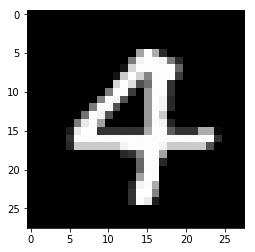

Label: 4


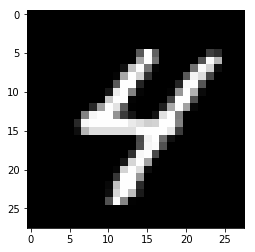

Label: 1


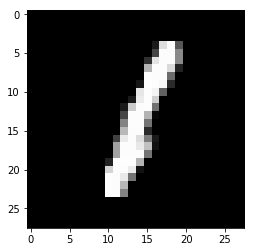

Label: 0


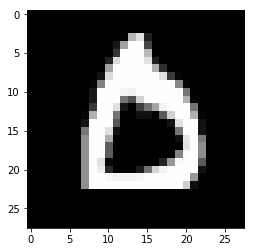

Label: 0


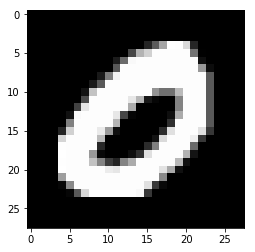

In [22]:
random.seed(23)
random_ids = random.sample(population=range(0, x_train.shape[0]),k=5)
random_imgs = x_train[random_ids, :]
random_labels = y_train[random_ids]

# display random images
for i in range(0, len(random_ids)):
    print("Label: %s" % random_labels[i])
    plt.imshow(array_to_img(random_imgs[i,:]).convert('L'), cmap='gray')
    plt.show()

### Data Generators

Keras ImageDataGenerator implements transformations of images and allows us to stream data from a directory while training a model. The data pre-processing & streaming is done on CPU, while the model training is done on GPU to increase efficiency.

Data augmentation is a process where images are artificially altered to create 'new' artificial data that is similar. This helps to increase your data set & to avoid overfitting. Data augmentation operations are: flipping, cropping & zooming.

Data pre-processing operations like standardizations of pixel values have been shown to increase the efficiency of model training. Operations include: featurewise_center & featurewise_std_normalization.

In [41]:
# pre-processing of images
from keras.preprocessing.image import ImageDataGenerator

# data generator for training process
datagen_train = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# data generator for testing
datagen_test = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_train.fit(x_train)
datagen_test.fit(x_train)

# get some random images to show transformations
test = datagen.flow(random_imgs, random_labels)

# initialize flow from data
test_datagen = datagen_test.flow(x_test, y_test)
train_datagen = datagen_train.flow(x_train, y_train)


D:\Python\Anaconda\envs\tl\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


Label: 4


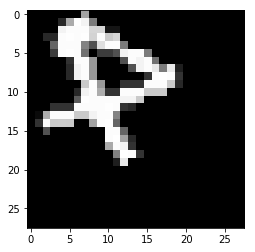

Label: 0


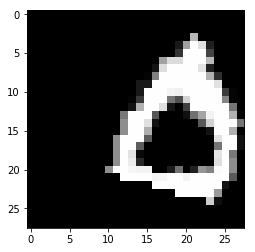

Label: 0


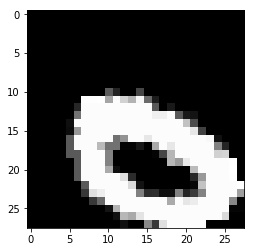

Label: 4


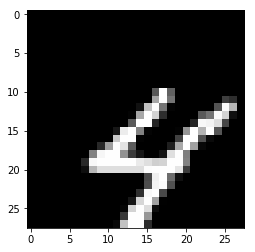

Label: 1


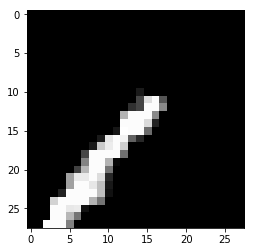

In [42]:
# Now we Check what the pre-processing does
data_batch = test.next()
for i in range(0, len(data_batch[1])):
    print("Label: %s" % data_batch[1][i])
    plt.imshow(array_to_img(data_batch[0][i,:]).convert('L'), cmap='gray')
    plt.show()


### Model Architecture
Now we define a model architecture, which consists of sequential layers of operations. The 2 blocks are the convolutional part and the fully connected part.

Convolutional layers: These layers extract features from the input (e.g. edges, corners, patterns).
Fully Connected layers: These layers take the features and assign them via weights to the output classes (standard Neural Network)

Typically convolutional layers consist of a convolution, followed by an activation and a pooling layer. Multiple of such layers can be stacked

In [46]:
# import keras model and layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Model compilation & training
The model is now compiled & configured. Important parameters include the optimizer and the loss function. The loss function for binary classifications is 'binary_crossentropy', which is what the model is trying to minimize during the training process. The optimizer defines how the gradients and their updates are calculated. Changing the optimizer can have a great effect on model convergence, if for example one changes to the stochastic gradient descent optimizer and chooses a high learning rate it may be that the model never converges.

Increase the number of epochs (full passes over the training data) to increase training time and model performance

In [49]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# train the model
model.fit_generator(
    train_datagen,
    steps_per_epoch=train_datagen.n // batch_size,
    epochs=5,
    workers=2,
    validation_data=test_datagen,
    validation_steps=test_datagen.n // batch_size)

Epoch 1/5
31/31 [==============================] - 15s - loss: 1.9049 - acc: 0.3115 - val_loss: 1.3947 - val_acc: 0.5579
Epoch 2/5
31/31 [==============================] - 14s - loss: 1.7443 - acc: 0.3881 - val_loss: 1.1494 - val_acc: 0.5830
Epoch 3/5
31/31 [==============================] - 16s - loss: 1.6177 - acc: 0.4345 - val_loss: 1.1058 - val_acc: 0.6773
Epoch 4/5
31/31 [==============================] - 14s - loss: 1.5486 - acc: 0.4456 - val_loss: 1.0117 - val_acc: 0.7107
Epoch 5/5
31/31 [==============================] - 14s - loss: 1.5101 - acc: 0.4940 - val_loss: 0.8554 - val_acc: 0.7376


### Evaluating the model
We can now look at a few predictions of our model

Predicted 40.48 percent of being a 3


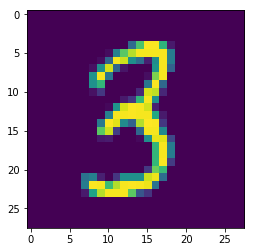

Predicted 72.61 percent of being a 4


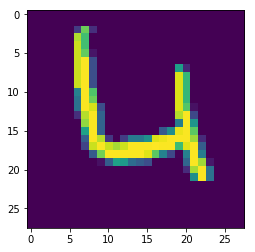

Predicted 43.02 percent of being a 4


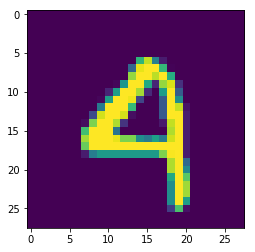

Predicted 91.62 percent of being a 7


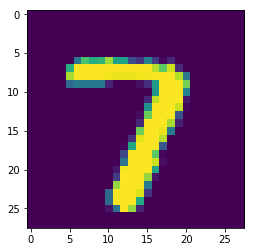

Predicted 71.01 percent of being a 6


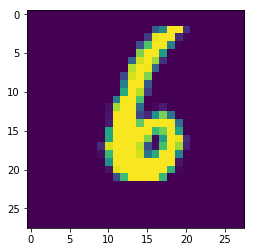

Predicted 58.67 percent of being a 6


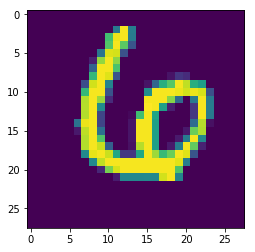

Predicted 54.54 percent of being a 6


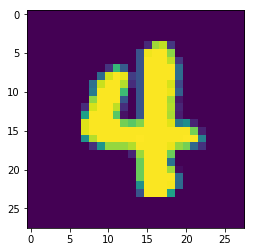

Predicted 80.14 percent of being a 8


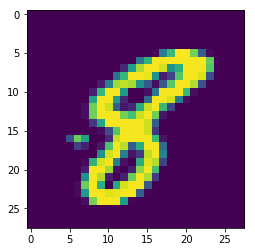

Predicted 83.55 percent of being a 0


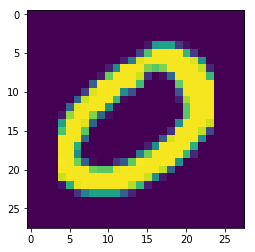

Predicted 54.83 percent of being a 6


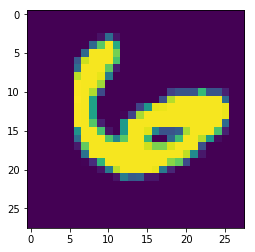

Predicted 33.03 percent of being a 8


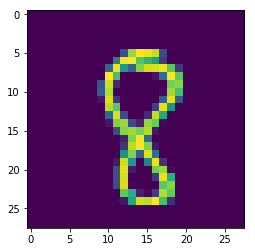

Predicted 29.62 percent of being a 9


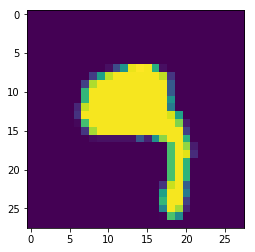

Predicted 59.9 percent of being a 6


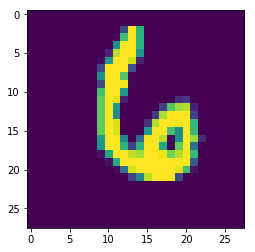

Predicted 44.13 percent of being a 7


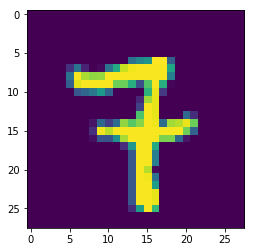

Predicted 24.95 percent of being a 5


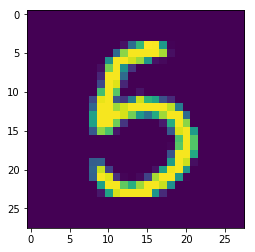

Predicted 98.05 percent of being a 1


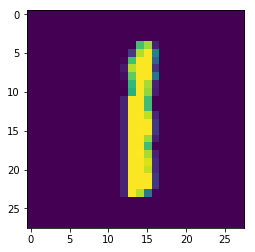

Predicted 63.66 percent of being a 7


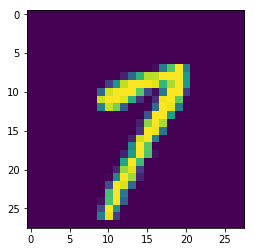

Predicted 46.98 percent of being a 6


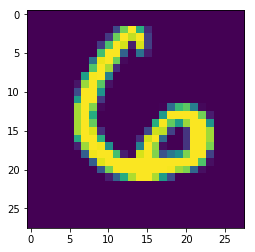

Predicted 55.63 percent of being a 3


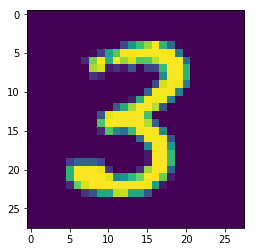

Predicted 45.65 percent of being a 6


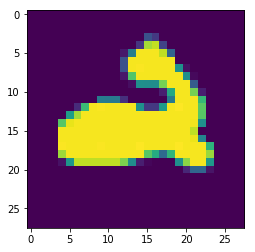

Predicted 65.74 percent of being a 7


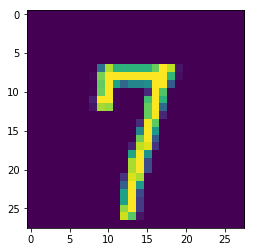

Predicted 60.56 percent of being a 0


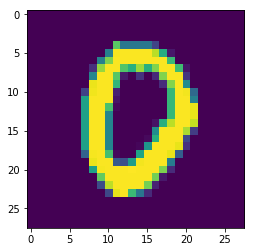

Predicted 45.56 percent of being a 9


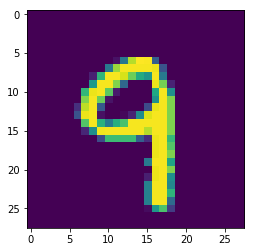

Predicted 98.19 percent of being a 1


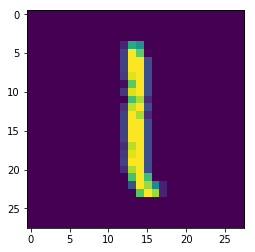

Predicted 26.21 percent of being a 3


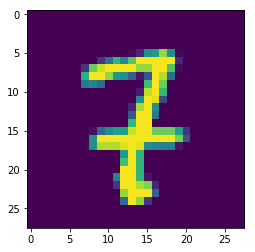

Predicted 79.44 percent of being a 6


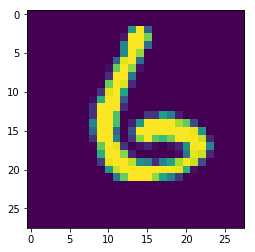

Predicted 49.58 percent of being a 8


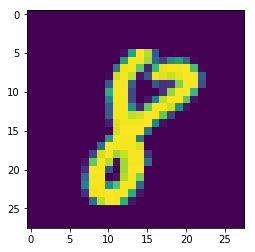

Predicted 95.82 percent of being a 0


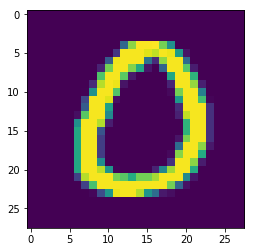

Predicted 44.9 percent of being a 2


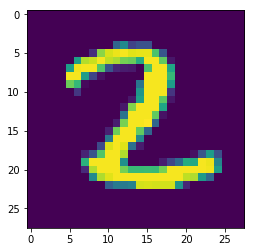

Predicted 30.42 percent of being a 7


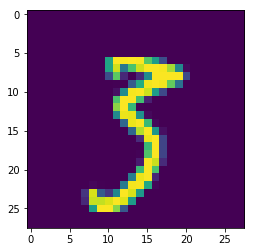

Predicted 81.19 percent of being a 6


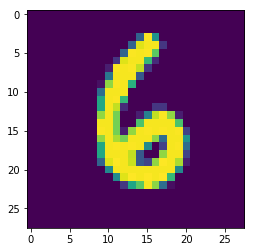

Predicted 57.11 percent of being a 3


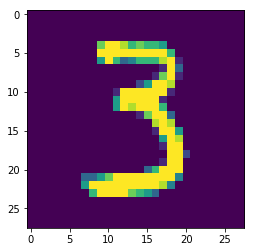

In [60]:
# predict on test sample

# get a test batch
test_batch_data = test_datagen.next()

# calculate predictions
p_test = model.predict_on_batch(test_batch_data[0])

# show some images and their prediction
for i in range(0, len(test_batch_data[1])):
    id_max = np.argmax(p_test[i])
    max_val = np.max(p_test[i])
    print("Predicted %s percent of being a %s" %
          (round(float(max_val * 100), 2), id_max))
    plt.imshow(array_to_img(test_batch_data[0][i, :]))
    plt.show()

### Take a look at some of the trained filters
We can extract filters from the model and take a look at them.

{'dense_12': <keras.layers.core.Dense object at 0x0000027EAF061C88>, 'dropout_14': <keras.layers.core.Dropout object at 0x0000027EAF061208>, 'max_pooling2d_7': <keras.layers.pooling.MaxPooling2D object at 0x0000027E904DA9B0>, 'flatten_7': <keras.layers.core.Flatten object at 0x0000027EA1EB9588>, 'conv2d_14': <keras.layers.convolutional.Conv2D object at 0x0000027EAF0AFA20>, 'dropout_13': <keras.layers.core.Dropout object at 0x0000027EAF0AB1D0>, 'dense_13': <keras.layers.core.Dense object at 0x0000027EB0171550>, 'conv2d_15': <keras.layers.convolutional.Conv2D object at 0x0000027EAF0AF9E8>}
(1, 28, 28, 1)
(28, 28, 1)


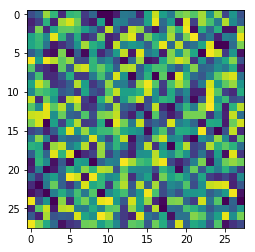

In [97]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
from keras import backend as K

layer_name = 'conv2d_14'
filter_index = 3 # can be any integer from 0 to 14, as there are 15 filters in that layer

# choose a random image
input_img = model.input

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1,28, 28, 1)) * 20 + 128.
print(input_img_data.shape)

step = 1.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    # x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)

print(img.shape)
plt.imshow(array_to_img(img))
plt.show()